# Hello Quantum for Jupyter notebook

[Hello Quantum](https://helloquantum.mybluemix.net/) is a project based on the idea of visualizing two qubit states and gates, and making them accessible to a non-specialist audience.

In the *hello_quantum.py* file you'll find some tools with which the 'Hello Quantum' visualizations and puzzles can be implemented in Jupyter notebooks. These were used to create the puzzles in the [Hello_Qiskit](../hello_quantum.ipynb) notebook, but you can also create your own custom ones. These could then be used as part of presentations given about Qiskit, or self-study materials prepared for people learning Qiskit.

To use it, import `hello_quantum` and use matplotlib magic.

In [1]:
%matplotlib notebook
import hello_quantum

The import here was very simple, because this notebook is in the same folder as the *hello_quantum.py* file. If this is not the case, you'll have to change the path. See the [Hello_Qiskit](../hello_quantum.ipynb) notebook for an example of this.

Once the import has been done, you can set up and display the visualization.

<IPython.core.display.Javascript object>


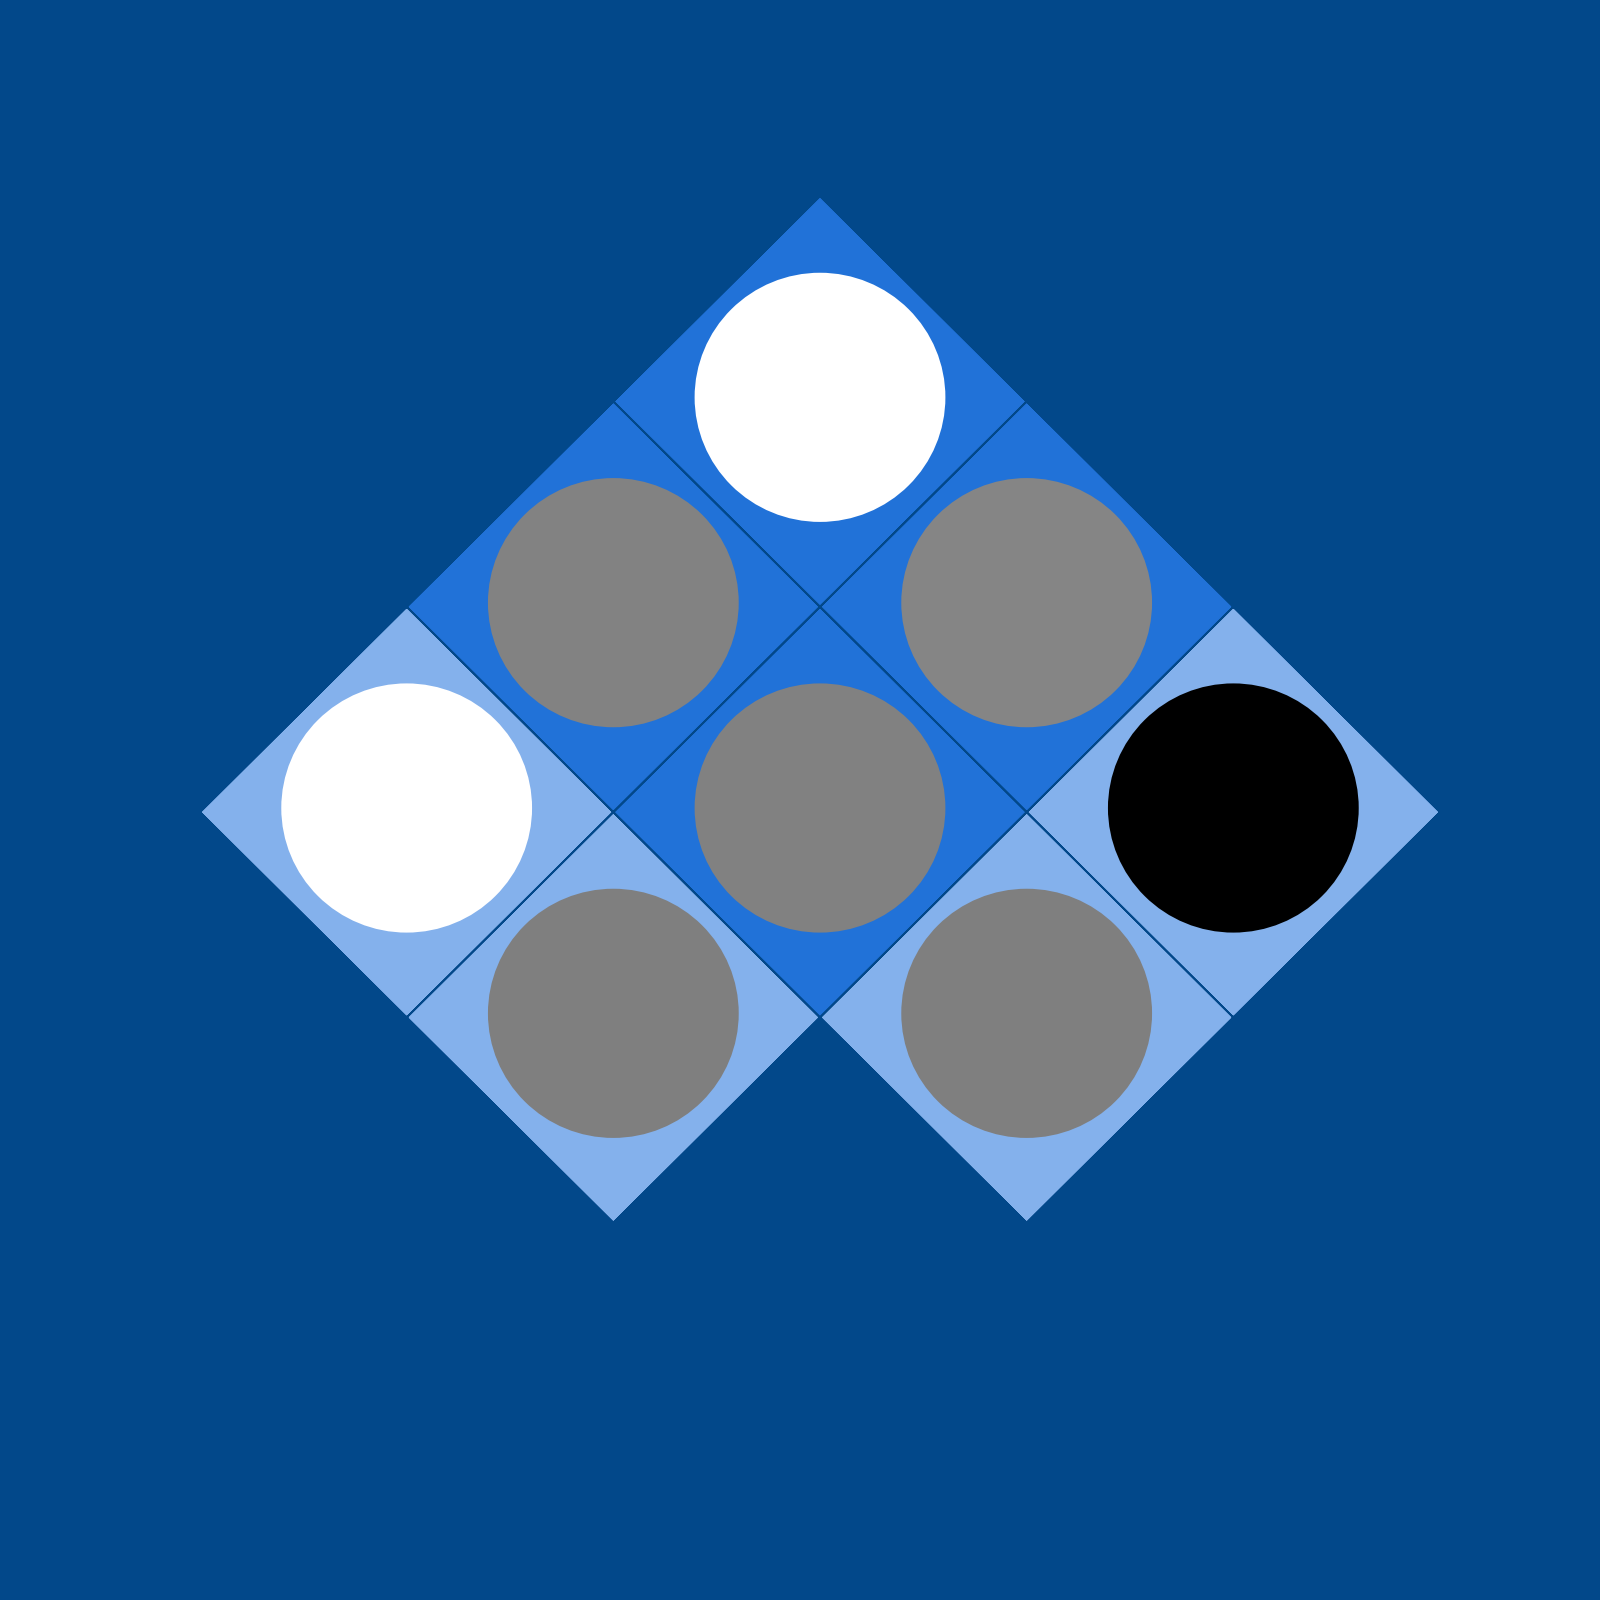

In [2]:
grid = hello_quantum.pauli_grid()
grid.update_grid()

This has attributes and methods which create and run quantum circuits with Qiskit.

In [3]:
for gate in [['x','1'],['h','0'],['z','0'],['h','1'],['z','1']]:
    command = 'grid.qc.'+gate[0]+'(grid.qr['+gate[1]+'])'
    eval(command)
    grid.update_grid()

There is also an alternative visualization, which can be used to better represent non-Clifford gates.

<IPython.core.display.Javascript object>


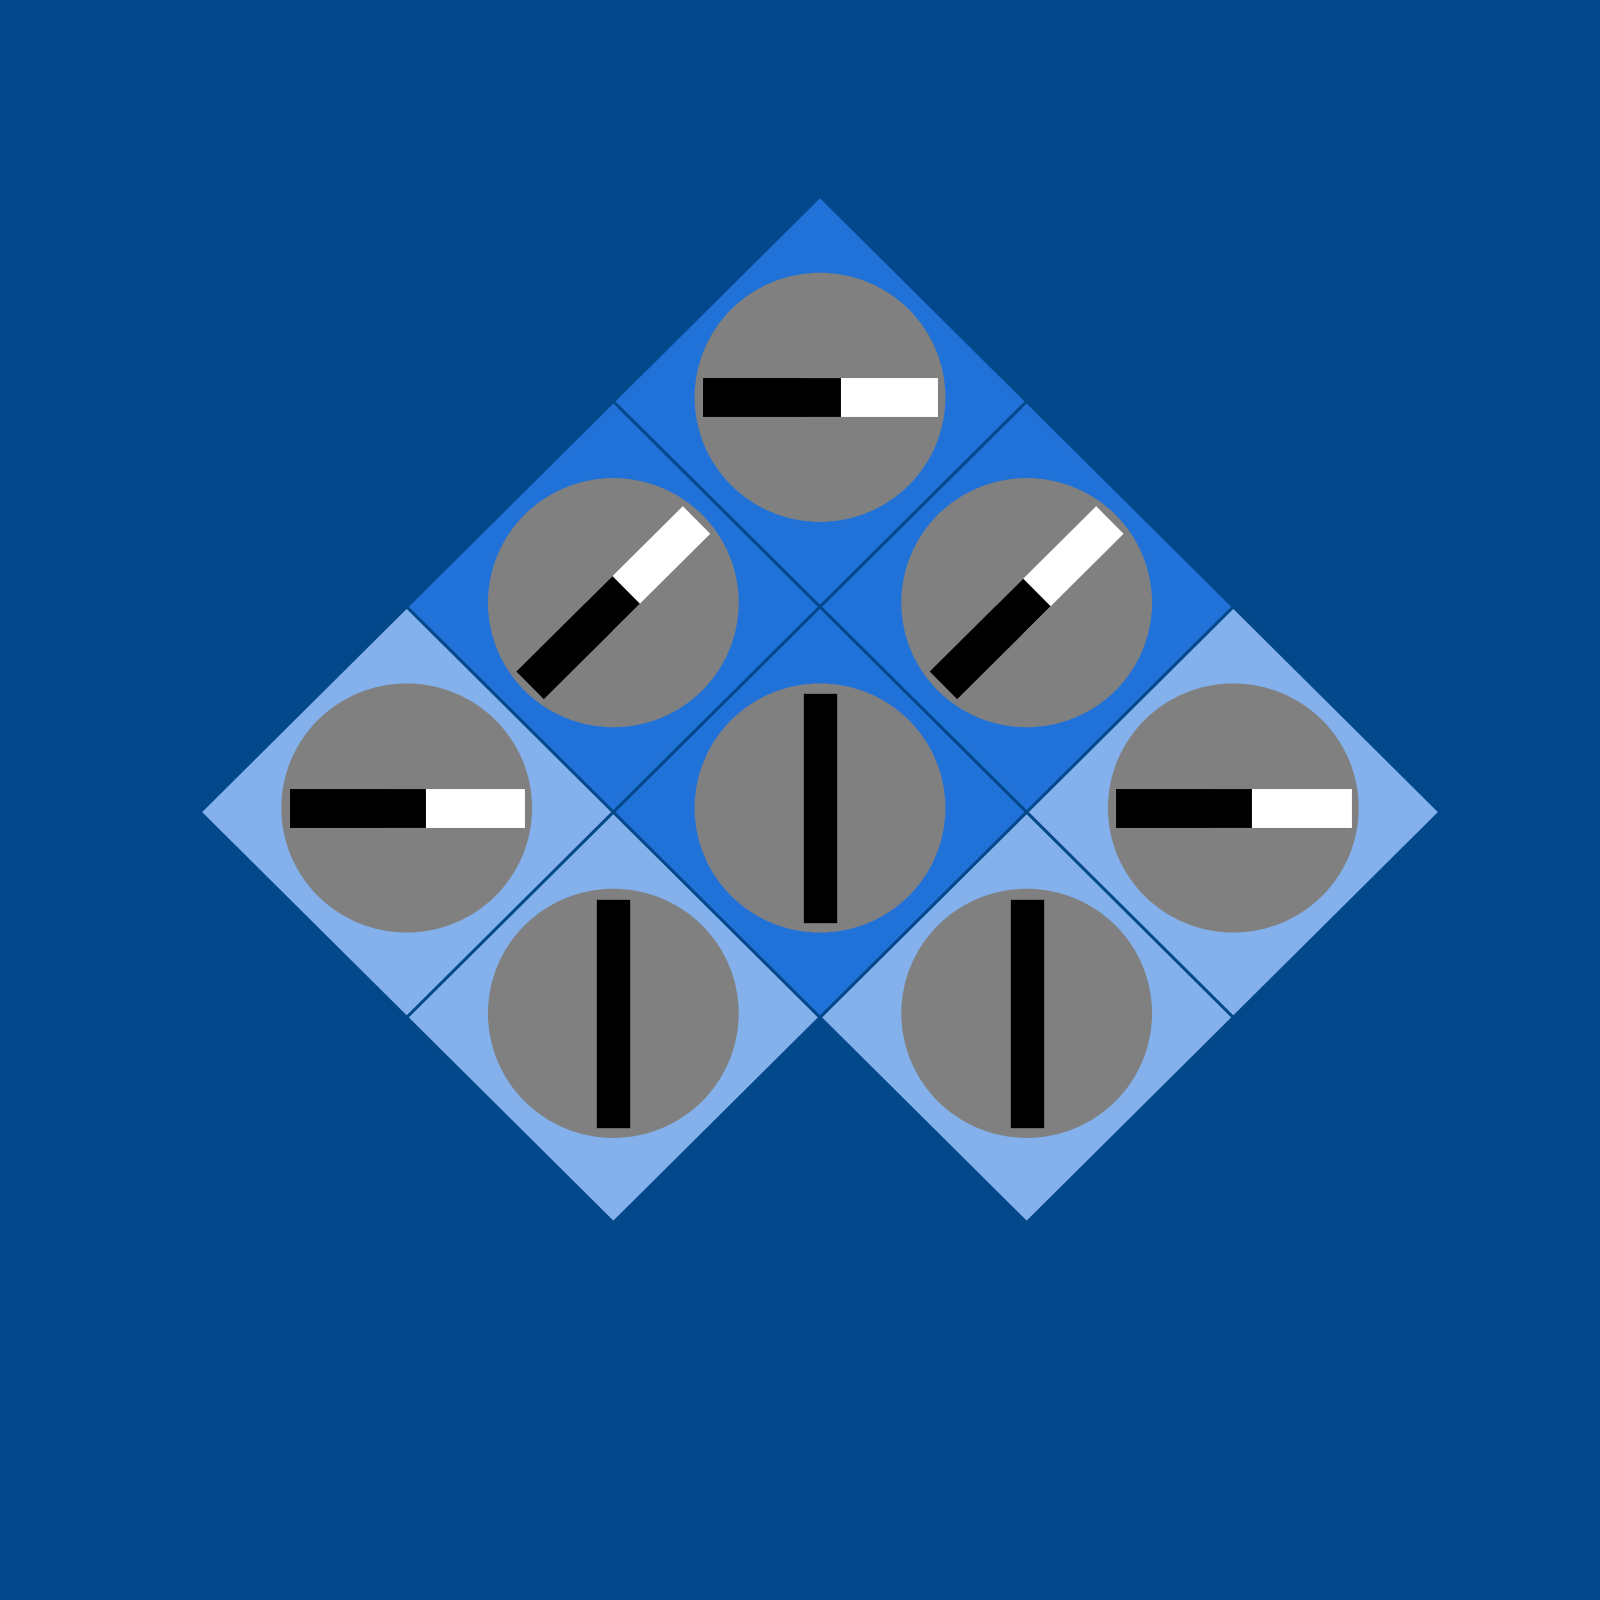

In [4]:
grid = hello_quantum.pauli_grid(mode='line')
grid.update_grid()

The `run_game` function, can also be used to implement custom 'Hello Quantum' games within a notebook. One example can be found below, but it is better to look at the other notebooks in this folder.

<IPython.core.display.Javascript object>


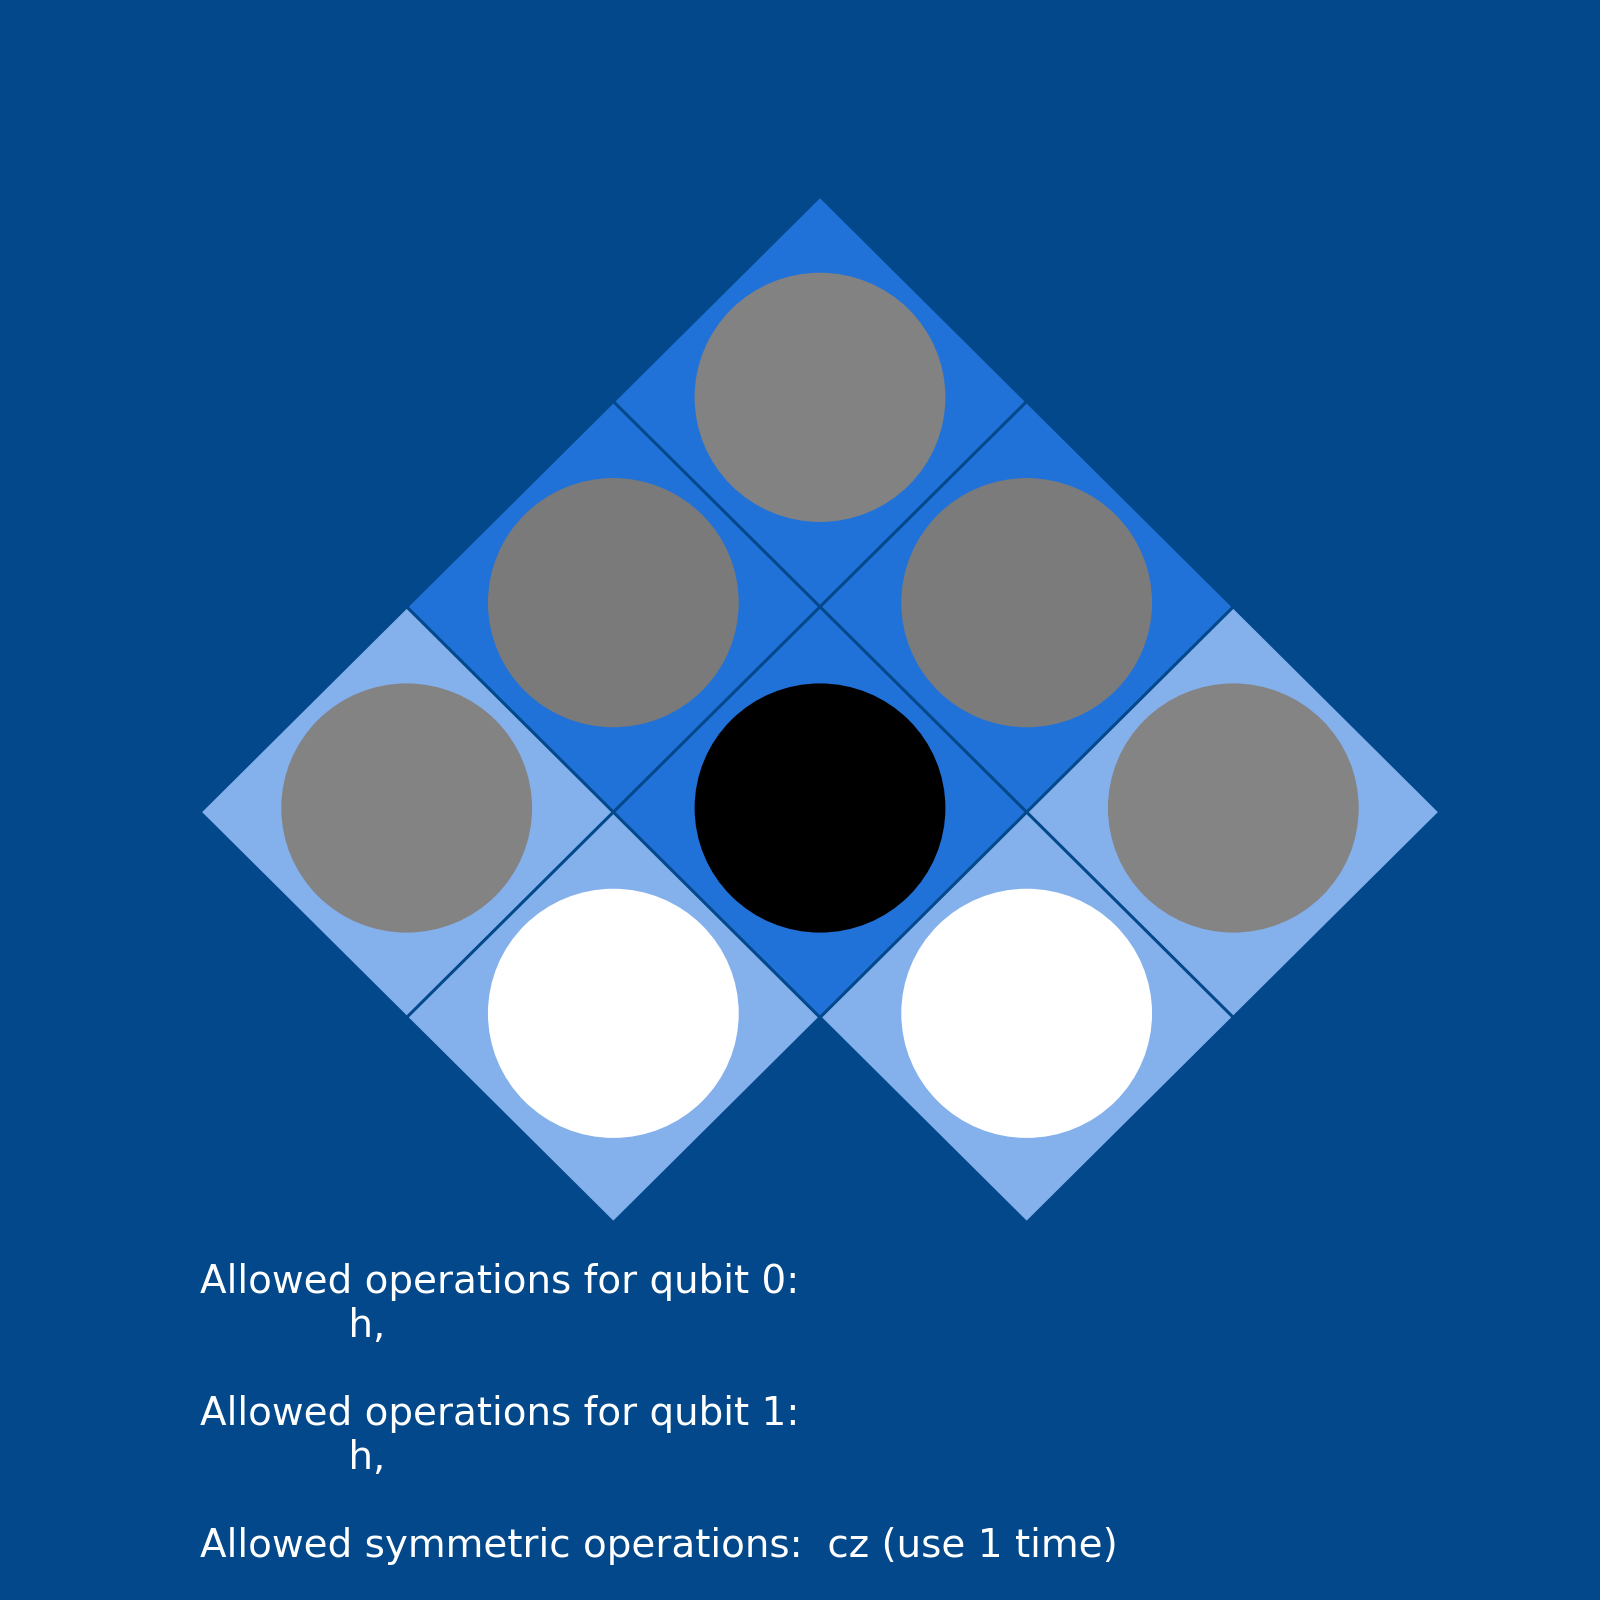


Your quantum program so far



In [5]:
# list of gates applied to the initial 00 state to get the starting state of the puzzle
# supported single qubit gates (applied to qubit '0' or '1') are 'x', 'y', 'z', 'h', 'ry(pi/4)'
# supported two qubit gates are 'cz' and 'cx'. Specify only the target qubit.
initialize = [['x', '0'],['cx', '1']]
# values for pauli observables that must be obtained for the puzzle to declare success
success_condition = {'IZ': 1.0}
# for each qubit, specify which operations are allowed in this puzzle
# 'both' should be used only for operations that don't need a qubit to be specified ('cz' and 'unbloch')
# gates are expressed as a dict with an int as value. If this is non-zero, it specifies the number of times the gate is must be used (no more or less) for the puzzle to be successfully solved.
# If the value is zero, the player can use the gate any number of times. 
allowed_gates = {'0': {'h':0}, '1': {'h':0}, 'both': {'cz': 1}}
# some visualization information as a three element list. These specify:
# * which qubits are hidden (empty list if both shown)
# * whether both circles shown for each qubit? (use True for qubit puzzles and False for bit puzzles)
# * whether the correlation circles (the four in the middle) are shown
vi = [[], True, True]
# the two qubits are always called '0' and '1' from the programming side. But for the player, we can display different names.
qubit_names = {'0':'qubit 0', '1':'qubit 1'}
# now we have specified everyting, we can run the puzzle
puzzle = hello_quantum.run_game(initialize, success_condition, allowed_gates, vi, qubit_names)